In [1]:
import pandas as pd 
import numpy as np
import csv
from numpy import array
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
file1 = pd.read_csv('train.csv',sep=',\s*') 
file1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
X_test = pd.read_csv('test.csv',sep=',\s*')
X_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [4]:
Y_test = pd.read_csv('sample_submission.csv',sep=',\s*')
Y_test

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [5]:
file2 = pd.merge(X_test, Y_test, on='Id')

In [6]:
pd.set_option('display.max_columns', None)
file1 = file1.append(file2, ignore_index=True)
file2 = file1
file2 #итоговый набор признаков

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.000000
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.000000
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.000000
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.000000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,167081.220949
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,164788.778231
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,219222.423400
2917,2918,85,RL

In [7]:
file2.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180052.854647
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,57381.565721
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,154795.084126
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,176734.841494
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,191895.744157
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [8]:
file2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [9]:
#Сразу удалим столбец Id и столбцы, где слишком мало непустых значений: PoolQC,  Alley, Fence
file2 = file2.drop(["Id","PoolQC","Alley","Fence"],  axis=1)
file2

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,0,2,2008,WD,Normal,208500.000000
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,0,5,2007,WD,Normal,181500.000000
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,0,9,2008,WD,Normal,223500.000000
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,0,2,2006,WD,Abnorml,140000.000000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,0,12,2008,WD,Normal,250000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,0,6,2006,WD,Normal,167081.220949
2915,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,0,4,2006,WD,Abnorml,164788.778231
2916,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,0,9,2006,WD,Abnorml,219222.423400
2917,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0

In [10]:
#дальше заполним пустые значения во все столбцах

In [11]:
#В столбцах, где мало пустых и есть самое популярное значение - заполним самым популярным
file2["MSZoning"]=file2["MSZoning"].fillna('RL')
file2["Utilities"]=file2["Utilities"].fillna('AllPub')
file2["Electrical"]=file2["Electrical"].fillna('SBrkr')
file2["KitchenQual"]=file2["KitchenQual"].fillna('TA')
file2["Functional"]=file2["Functional"].fillna('Typ')
file2["SaleType"]=file2["SaleType"].fillna('WD')
file2["MasVnrType"]=file2["MasVnrType"].fillna('None')
file2["Exterior1st"]=file2["Exterior1st"].fillna('VinylSd')
file2["Exterior2nd"]=file2["Exterior2nd"].fillna('VinylSd')
file2["LotFrontage"]=file2["LotFrontage"].fillna(file2['LotFrontage'].mode()[0])
file2["BsmtFinSF1"]=file2["BsmtFinSF1"].fillna(file2["BsmtFinSF1"].mode()[0])
file2["BsmtFinSF2"]=file2["BsmtFinSF2"].fillna(file2["BsmtFinSF2"].mode()[0])
file2["BsmtUnfSF"]=file2["BsmtUnfSF"].fillna(file2["BsmtUnfSF"].mode()[0])

In [12]:
#В столбцах, где пропущенные значения обозначает отсутствие чего-либо - для категориальных земеним на "NA", а для числовых на 0
file2["BsmtQual"]=file2["BsmtQual"].fillna('NA')
file2["BsmtCond"]=file2["BsmtCond"].fillna('NA')
file2["MasVnrArea"]=file2["MasVnrArea"].fillna(0)
file2["BsmtExposure"]=file2["BsmtExposure"].fillna('NA')
file2["BsmtFinType1"]=file2["BsmtFinType1"].fillna('NA')
file2["BsmtFinType2"]=file2["BsmtFinType2"].fillna('NA')
file2["BsmtHalfBath"]=file2["BsmtHalfBath"].fillna(0.0)
file2["BsmtFullBath"]=file2["BsmtFullBath"].fillna(0.0)
file2["FireplaceQu"]=file2["FireplaceQu"].fillna('NA')
file2["GarageType"]=file2["GarageType"].fillna('NA')
file2["GarageYrBlt"]=file2["GarageYrBlt"].fillna(0.0)
file2["GarageFinish"]=file2["GarageFinish"].fillna('NA')
file2["GarageQual"]=file2["GarageQual"].fillna('NA')
file2["GarageCond"]=file2["GarageCond"].fillna('NA')
file2["GarageCars"]=file2["GarageCars"].fillna(0.0)
file2["GarageArea"]=file2["GarageArea"].fillna(0.0)
file2["MiscFeature"]=file2["MiscFeature"].fillna('NA')

In [13]:
#А в столбце TotalBsmtSF пустые заменим на сумму трех других:
file2["TotalBsmtSF"]=file2["TotalBsmtSF"].fillna(file2["BsmtUnfSF"][0]+file2["BsmtFinSF1"][0]+file2["BsmtFinSF2"][0])


In [14]:
#Убедимся, что пустых значений больше нет
file2.isnull().any().any()

False

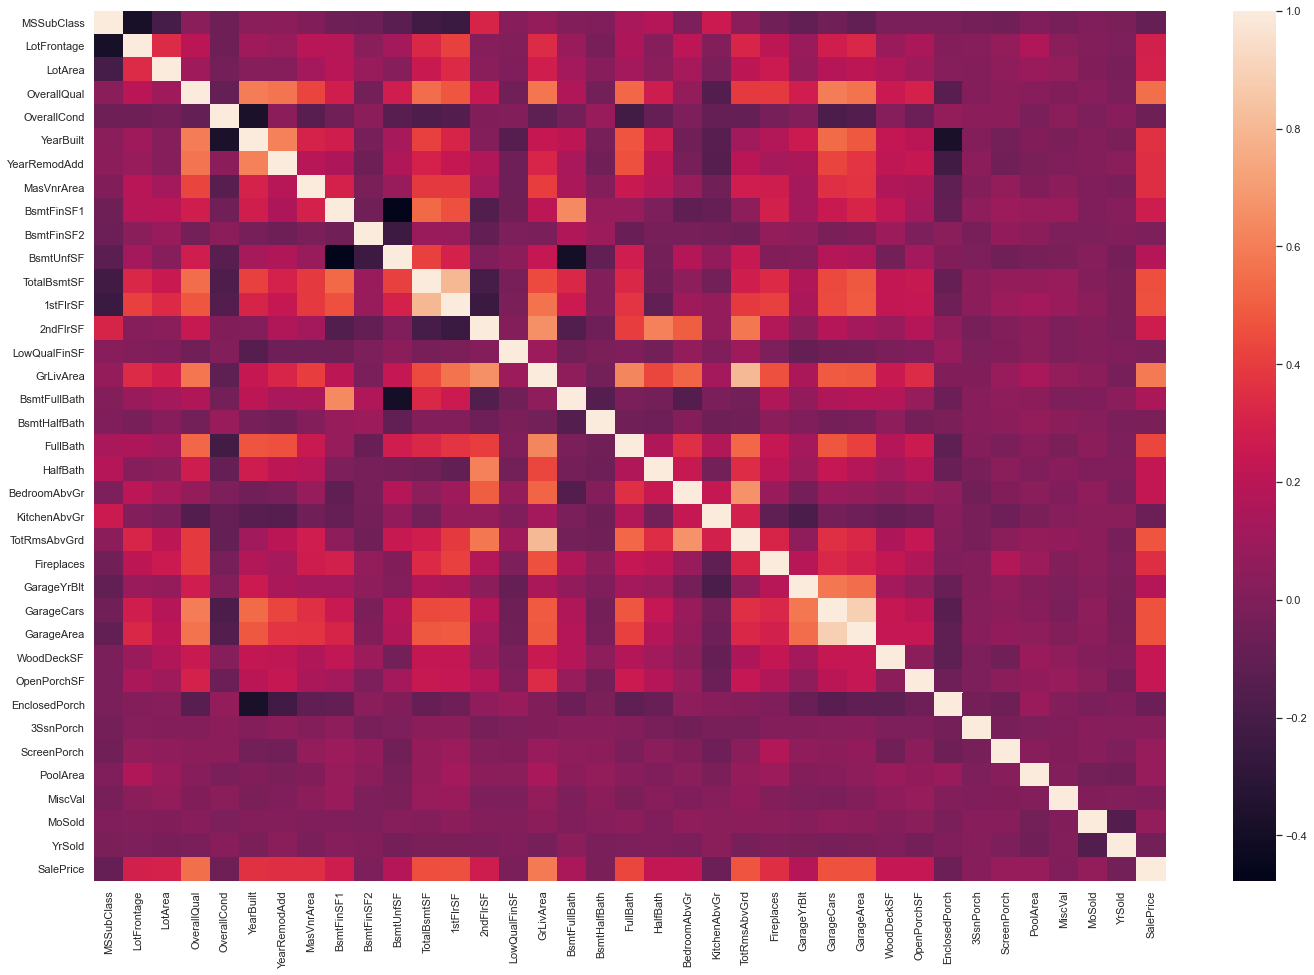

In [15]:
#Построим корреляционную матрицу
plt.rcParams['figure.figsize'] = (24,16) #Нужен больший масштаб
sns.heatmap(file2.corr())

In [16]:
# Видно, что с ценой особенно сильно коррелируют следующие признаки: 
#OverallQual, GrLivArea, TotRmsAbvGrd, GarageArea, GarageCars, 1stFlrSF, TotalBsmtSF
#рассмотрим их отдельно

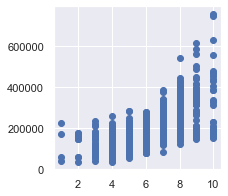

In [17]:
plt.rcParams['figure.figsize'] = (3,3) 
plt.scatter(file2["OverallQual"],file2['SalePrice'])

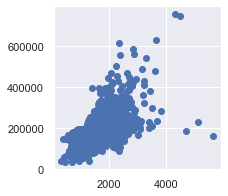

In [18]:
plt.rcParams['figure.figsize'] = (3,3) 
plt.scatter(file2["GrLivArea"],file2['SalePrice'])

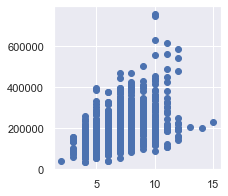

In [19]:
plt.rcParams['figure.figsize'] = (3,3) 
plt.scatter(file2["TotRmsAbvGrd"],file2['SalePrice'])

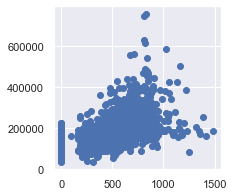

In [20]:
plt.rcParams['figure.figsize'] = (3,3) 
plt.scatter(file2["GarageArea"],file2['SalePrice'])

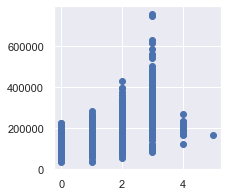

In [21]:
plt.rcParams['figure.figsize'] = (3,3) 
plt.scatter(file2["GarageCars"],file2['SalePrice'])

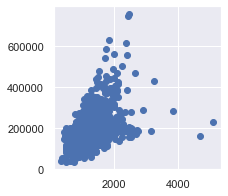

In [22]:
plt.rcParams['figure.figsize'] = (3,3) 
plt.scatter(file2["1stFlrSF"],file2['SalePrice'])

In [23]:
#Уберем признаки, которые сильно коррелируют c другими и слабо с ценой:
file2 = file2.drop(['LotFrontage','LotShape','LandContour','Utilities','Condition2','HouseStyle','YearRemodAdd','RoofMatl','Exterior2nd','MasVnrArea','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','Heating','1stFlrSF','2ndFlrSF','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','KitchenQual','Functional','Fireplaces','FireplaceQu','GarageYrBlt','GarageCars','GarageArea','GarageQual','GarageCond','OpenPorchSF','MiscFeature','MoSold'], axis=1)

In [24]:
#Полученная матрица:
file2

,MSSubClass,MSZoning,LotArea,Street,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,OverallQual,OverallCond,YearBuilt,RoofStyle,Exterior1st,MasVnrType,Foundation,BsmtFinType1,TotalBsmtSF,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BsmtHalfBath,TotRmsAbvGrd,GarageType,GarageFinish,PavedDrive,WoodDeckSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Inside,Gtl,CollgCr,Norm,1Fam,7,5,2003,Gable,VinylSd,BrkFace,PConc,GLQ,856.0,Ex,Y,SBrkr,0,1710,0.0,8,Attchd,RFn,Y,0,0,0,0,0,0,2008,WD,Normal,208500.000000
1,20,RL,9600,Pave,FR2,Gtl,Veenker,Feedr,1Fam,6,8,1976,Gable,MetalSd,None,CBlock,ALQ,1262.0,Ex,Y,SBrkr,0,1262,1.0,6,Attchd,RFn,Y,298,0,0,0,0,0,2007,WD,Normal,181500.000000
2,60,RL,11250,Pave,Inside,Gtl,CollgCr,Norm,1Fam,7,5,2001,Gable,VinylSd,BrkFace,PConc,GLQ,920.0,Ex,Y,SBrkr,0,1786,0.0,6,Attchd,RFn,Y,0,0,0,0,0,0,2008,WD,Normal,223500.000000
3,70,RL,9550,Pave,Corner,Gtl,Crawfor,Norm,1Fam,7,5,1915,Gable,Wd Sdng,None,BrkTil,ALQ,756.0,Gd,Y,SBrkr,0,1717,0.0,7,Detchd,Unf,Y,0,272,0,0,0,0,2006,WD,Abnorml,140000.000000
4,60,RL,14260,Pave,FR2,Gtl,NoRidge,Norm,1Fam,8,5,2000,Gable,VinylSd,BrkFace,PConc,GLQ,1145.0,Ex,Y,SBrkr,0,2198,0.0,9,Attchd,RFn,Y,192,0,0,0,0,0,2008,WD,Normal,250000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,1936,Pave,Inside,Gtl,MeadowV,Norm,Twnhs,4,7,1970,Gable,CemntBd,None,CBlock,Unf,546.0,Gd,Y,SBrkr,0,1092,0.0,5,NA,NA,Y,0,0,0,0,0,0,2006,WD,Normal,167081.220949
2915,160,RM,1894,Pave,Inside,Gtl,MeadowV,Norm,TwnhsE,4,5,1970,Gable,CemntBd,None,CBlock,Rec,546.0,TA,Y,SBrkr,0,1092,0.0,6,CarPort,Unf,Y,0,0,0,0,0,0,2006,WD,Abnorml,164788.778231
2916,20,RL,20000,Pave,Inside,Gtl,Mitchel,Norm,1Fam,5,7,1960,Gable,VinylSd,None,CBlock,ALQ,1224.0,Ex,Y,SBrkr,0,1224,0.0,7,Detchd,Unf,Y,474,0,0,0,0,0,2006,WD,Abnorml,219222.423400
2917,85,RL,10441,Pave,Inside,Gtl,Mitchel,Norm,1Fam,5,5,1992,Gable,HdBoard,None,PConc,GLQ,912.0,TA,Y,SBrkr,0,970,1.0,6,NA,NA,Y,80,0,0,0,0,700,2006,WD,Normal,184924.279659


In [25]:
#Функция для устранения выбросов
def quant(df, col):
    df[col] = df[col].fillna(df.mean())
    Q1 = df[col].describe()['25%']
    Q3 = df[col].describe()['75%']
    IQR = Q3 - Q1
    leftThreshold = Q1 - 1.5 * IQR
    rightThreshold = Q3 + 1.5 * IQR
    df.loc[(df[col] < leftThreshold) | (df[col] > rightThreshold), col] = None
    # считаем среднее значение оставшихся значений
    mean = df[col].mean()
    # меняем на среднее значение
    df[col] = df[col].fillna(mean)

In [26]:
#Удалим выбросы из числовых признаков

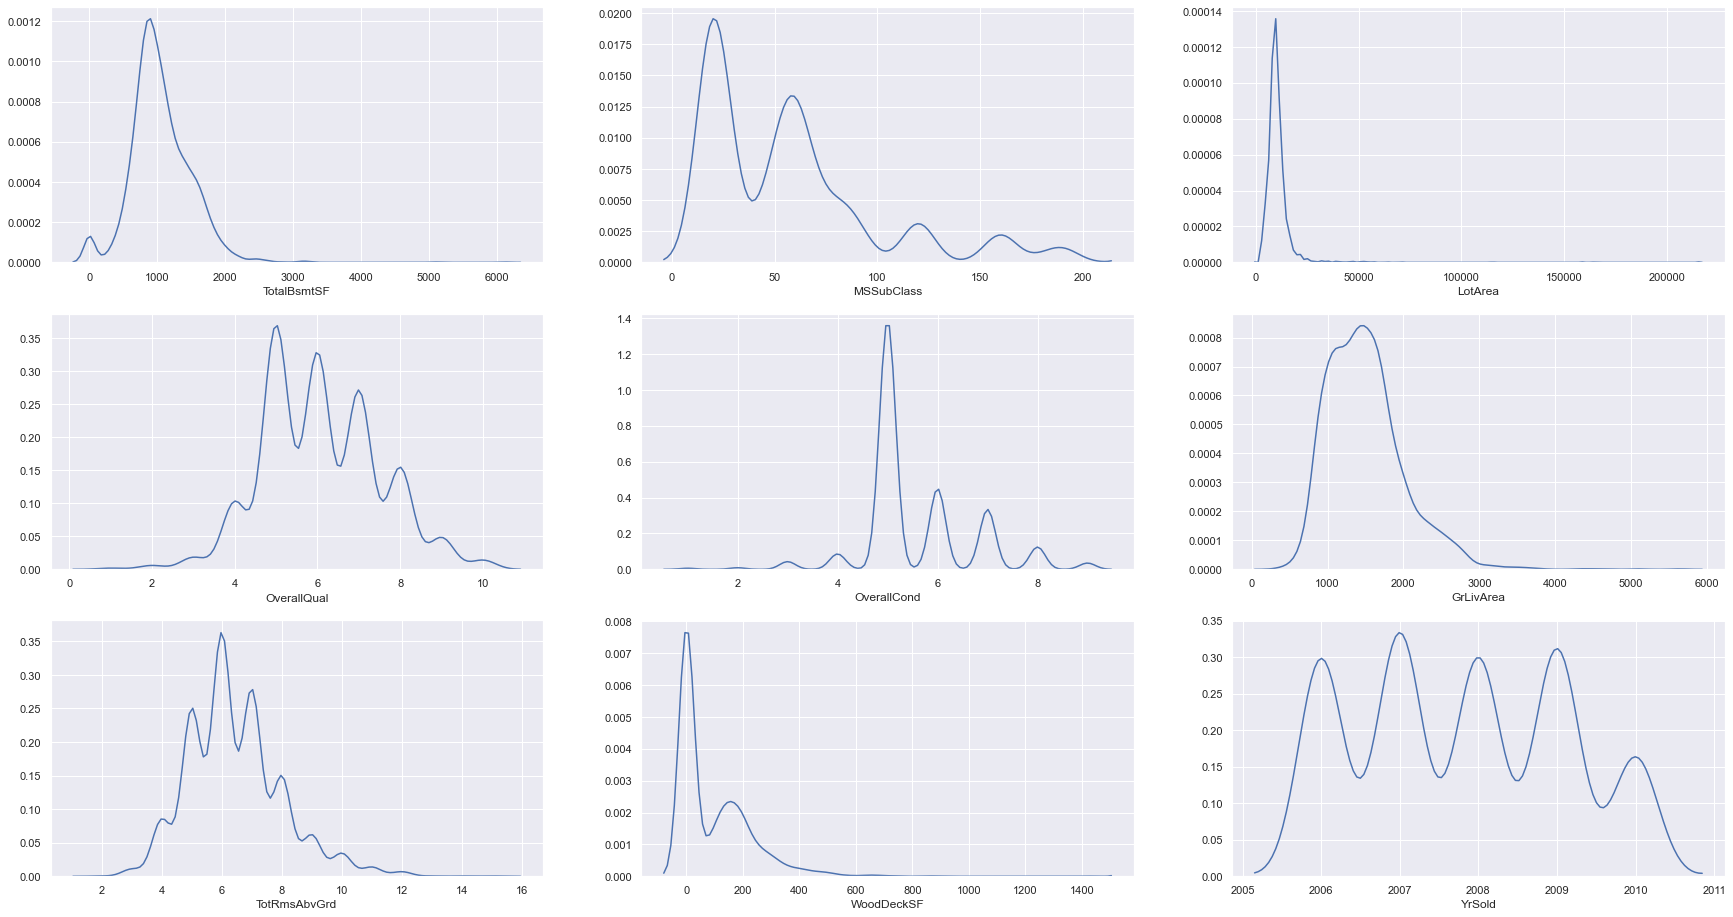

In [27]:
plt.rcParams['figure.figsize'] = (30,16)
fig, axes = plt.subplots(ncols=3, nrows=3)
ttt = ["TotalBsmtSF","MSSubClass","LotArea","OverallQual","OverallCond", "GrLivArea",
      "TotRmsAbvGrd","WoodDeckSF","YrSold"]
for i, ax in zip(range(10), axes.flat):
    s = ttt[i]
    sns.distplot(file2[s], hist=False, ax=ax)
plt.show()

In [28]:
quant(file2, "TotalBsmtSF")
quant(file2, "MSSubClass")
quant(file2, "LotArea")
quant(file2, "OverallQual")
quant(file2, "OverallCond")
quant(file2, "LowQualFinSF")
quant(file2, "GrLivArea")
quant(file2, "TotRmsAbvGrd")
quant(file2, "WoodDeckSF")
quant(file2, "EnclosedPorch")
quant(file2, "3SsnPorch")
quant(file2, "ScreenPorch")
quant(file2, "PoolArea")
quant(file2, "MiscVal")
quant(file2, "YrSold")

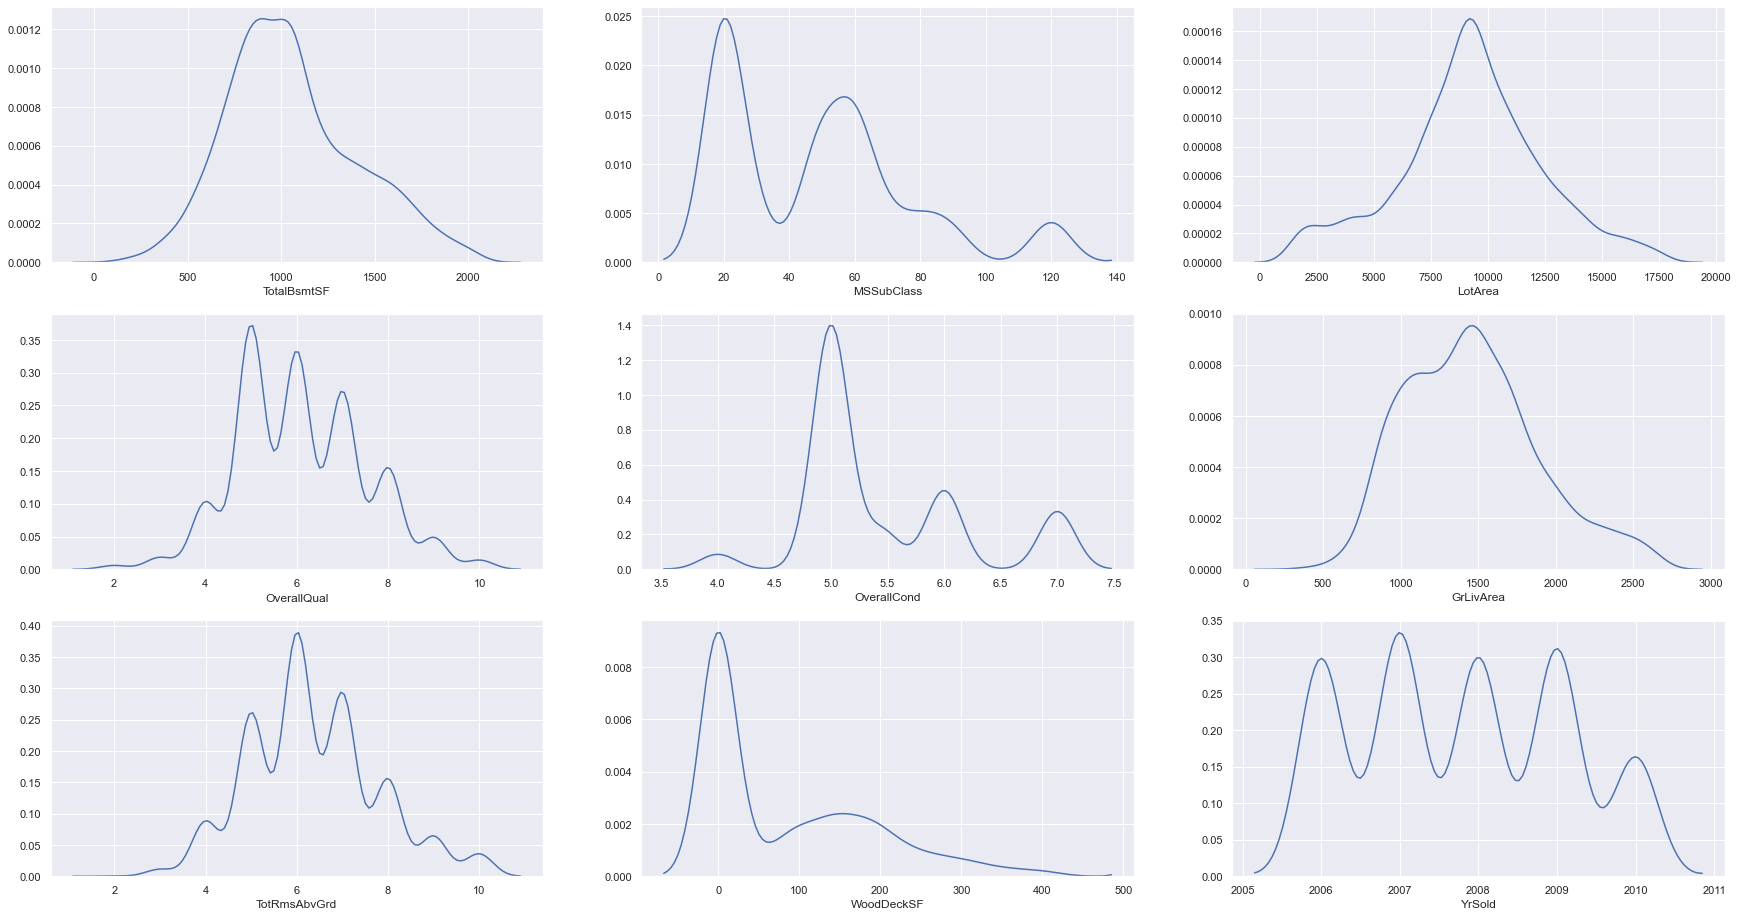

In [29]:
#Посмотрим результат
plt.rcParams['figure.figsize'] = (30,16)
fig, axes = plt.subplots(ncols=3, nrows=3)
ttt = ["TotalBsmtSF","MSSubClass","LotArea","OverallQual","OverallCond", "GrLivArea",
      "TotRmsAbvGrd","WoodDeckSF","YrSold"]
for i, ax in zip(range(10), axes.flat):
    s = ttt[i]
    sns.distplot(file2[s], hist=False, ax=ax)
plt.show()

In [30]:
#Закодируем бинарные признаки
file2.loc[file2["Street"] == "Pave","Street"] = 0
file2.loc[file2["CentralAir"] == "Y","CentralAir"] = 0
file2.loc[file2["Street"] == "Grvl","Street"] = 1
file2.loc[file2["CentralAir"] == "N","CentralAir"] = 1

In [31]:
def targetEncoder(column):
    import category_encoders as ce
    encoder = ce.TargetEncoder()
    encoder.fit(column, file2["SalePrice"])
    column = encoder.transform(column)
    return column

In [32]:
#Закодируем категориальные признаки
z = ['MSZoning','LotConfig','LandSlope','Neighborhood','Condition1','BldgType','RoofStyle', 'Exterior1st','MasVnrType',
 'Foundation','BsmtFinType1','HeatingQC','Electrical','GarageType','GarageFinish','PavedDrive','SaleType','SaleCondition']
for i in z:
    file2[z] = targetEncoder(file2[z])

In [33]:
#Итоговая матрица признаков file2
file2

,MSSubClass,MSZoning,LotArea,Street,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,OverallQual,OverallCond,YearBuilt,RoofStyle,Exterior1st,MasVnrType,Foundation,BsmtFinType1,TotalBsmtSF,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BsmtHalfBath,TotRmsAbvGrd,GarageType,GarageFinish,PavedDrive,WoodDeckSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SaleType,SaleCondition,SalePrice
0,60.000000,186578.109532,8450.000000,0,177597.155592,179656.041570,190383.778312,181556.696800,183521.612232,7.0,5.000000,2003,174932.753801,197149.583433,193542.549205,202048.794918,205778.159147,856.0,197193.841792,0,183126.76076,0.0,1710.0,0.0,8.0,191400.499528,191147.064501,183006.578012,0.000000,0.0,0.0,0.0,0.0,0.0,2008.0,176251.298953,176880.442646,208500.000000
1,20.000000,186578.109532,9600.000000,0,179229.574316,179656.041570,208532.115593,162127.095217,183521.612232,6.0,5.453693,1976,174932.753801,162282.710066,167542.473050,164469.682491,170670.919086,1262.0,197193.841792,0,183126.76076,0.0,1262.0,1.0,6.0,191400.499528,191147.064501,183006.578012,298.000000,0.0,0.0,0.0,0.0,0.0,2007.0,176251.298953,176880.442646,181500.000000
2,60.000000,186578.109532,11250.000000,0,177597.155592,179656.041570,190383.778312,181556.696800,183521.612232,7.0,5.000000,2001,174932.753801,197149.583433,193542.549205,202048.794918,205778.159147,920.0,197193.841792,0,183126.76076,0.0,1786.0,0.0,6.0,191400.499528,191147.064501,183006.578012,0.000000,0.0,0.0,0.0,0.0,0.0,2008.0,176251.298953,176880.442646,223500.000000
3,70.000000,186578.109532,9550.000000,0,180945.038758,179656.041570,197075.993040,181556.696800,183521.612232,7.0,5.000000,1915,174932.753801,164752.848433,167542.473050,155105.810946,170670.919086,756.0,167142.445827,0,183126.76076,0.0,1717.0,0.0,7.0,154917.222076,160465.209058,183006.578012,0.000000,0.0,0.0,0.0,0.0,0.0,2006.0,176251.298953,162791.271789,140000.000000
4,60.000000,186578.109532,14260.000000,0,179229.574316,179656.041570,275074.860533,181556.696800,183521.612232,8.0,5.000000,2000,174932.753801,197149.583433,193542.549205,202048.794918,205778.159147,1145.0,197193.841792,0,183126.76076,0.0,2198.0,0.0,9.0,191400.499528,191147.064501,183006.578012,192.000000,0.0,0.0,0.0,0.0,0.0,2008.0,176251.298953,176880.442646,250000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,48.490044,149512.759754,1936.000000,0,177597.155592,179656.041570,132416.435267,181556.696800,148218.668838,4.0,7.000000,1970,174932.753801,200947.444710,167542.473050,164469.682491,175700.407959,546.0,167142.445827,0,183126.76076,0.0,1092.0,0.0,5.0,139417.812690,140080.234269,183006.578012,0.000000,0.0,0.0,0.0,0.0,0.0,2006.0,176251.298953,176880.442646,167081.220949
2915,48.490044,149512.759754,1894.000000,0,177597.155592,179656.041570,132416.435267,181556.696800,170080.978874,4.0,5.000000,1970,174932.753801,200947.444710,167542.473050,164469.682491,164132.453791,546.0,160646.907148,0,183126.76076,0.0,1092.0,0.0,6.0,134866.850938,160465.209058,183006.578012,0.000000,0.0,0.0,0.0,0.0,0.0,2006.0,176251.298953,162791.271789,164788.778231
2916,20.000000,186578.109532,9209.453601,0,177597.155592,179656.041570,171442.470149,181556.696800,183521.612232,5.0,7.000000,1960,174932.753801,197149.583433,167542.473050,164469.682491,170670.919086,1224.0,197193.841792,0,183126.76076,0.0,1224.0,0.0,7.0,154917.222076,160465.209058,183006.578012,83.306452,0.0,0.0,0.0,0.0,0.0,2006.0,176251.298953,162791.271789,219222.423400
2917,85.000000,186578.109532,10441.000000,0,177597.155592,179656.041570,171442.470149,181556.696800,183521.612232,5.0,5.000000,1992,174932.753801,171871.816425,167542.473050,202048.794918,205778.159147,912.0,160646.907148,0,183126.76076,0.0,970.0,1.0,6.0,139417.812690,140080.234269,183006.578012,80.000000,0.0,0.0,0.0,0.0,0.0,2006.0,176251.298953,176880.442646,184924.279659


In [34]:
from sklearn.model_selection import train_test_split
#Разделим выборки
newprice = file2["SalePrice"]
file2 = file2.drop(["SalePrice"],  axis=1)
X_train = file2[:1460]
X_test = file2[1460: ]
Y_train = newprice[:1460]
Y_test = newprice[1460:]
train_X, test_X, train_y, test_y = train_test_split(file2[:1460], newprice[:1460], train_size=0.7, random_state=1)

In [35]:
#линейная регрессия
from sklearn.metrics import r2_score as r2, mean_squared_error as mse
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(train_X, train_y)
y_pred = regressor.predict(test_X)
import numpy as np
from sklearn.metrics import mean_absolute_error
print(r2(test_y, y_pred))
rmse_lin = mse(test_y, y_pred) **0.5
r2_lin = r2(test_y, y_pred)
print(rmse_lin)

0.7900566651938526
38731.815537899936


In [36]:
#регуляризация L2
import math
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(train_X, train_y)
y_pred = ridge.predict(test_X)
rmse_l2 = math.sqrt(mse(test_y, y_pred))
r2_l2 = r2(test_y, y_pred)
print(rmse_l2)
print(r2_l2)

38717.69298269544
0.7902097381004931


In [37]:
#регуляризация L1
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_X, train_y)
y_pred = lasso.predict(test_X)
rmse_l1 = math.sqrt(mse(test_y, y_pred))
r2_l1 = r2(test_y, y_pred)
print(rmse_l1)
print(r2_l1)

38729.334750292765
0.790083558234442


In [38]:
from sklearn.ensemble import RandomForestRegressor
forestRegressor = RandomForestRegressor(n_estimators=20, random_state=0)
forestRegressor.fit(train_X, train_y)
y_pred = forestRegressor.predict(test_X)
print(r2(test_y, y_pred))
rmse_rf = mse(test_y, y_pred) **0.5
r2_rf = r2(test_y, y_pred)
print(rmse_rf)

0.8300118751515387
34851.871229370154


In [39]:
#Градиентный бустинг
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
params = {'n_estimators': 32}
gbr = GradientBoostingRegressor(**params)
gbr.fit(train_X, train_y)
y_pred = gbr.predict(test_X)
rmse_gb = math.sqrt(mse(test_y, y_pred))
r2_gb = r2(test_y, y_pred)
print(rmse_gb)
print(r2_gb)

32483.825997242428
0.8523271241264827


# Результаты обучения

In [40]:
print("Линейная регрессия:")
print("rmse " + str(rmse_lin))
print("r2 " + str(r2_lin))
print("L2:")
print("rmse " + str(rmse_l2))
print("r2 " + str(r2_l2))
print("L1:")
print("rmse " + str(rmse_l1))
print("r2 " + str(r2_l1))
print("Случайный лес:")
print("rmse " + str(rmse_rf))
print("r2 " + str(r2_rf))
print("Градиентный бустинг:")
print("rmse " + str(rmse_gb))
print("r2 " + str(r2_gb))

Линейная регрессия:
rmse 38731.815537899936
r2 0.7900566651938526
L2:
rmse 38717.69298269544
r2 0.7902097381004931
L1:
rmse 38729.334750292765
r2 0.790083558234442
Случайный лес:
rmse 34851.871229370154
r2 0.8300118751515387
Градиентный бустинг:
rmse 32483.825997242428
r2 0.8523271241264827


# Лучший результат у градиентного бустинга: r2=0.852 rmse=32483

In [41]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 50, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [42]:
gb = GradientBoostingRegressor()
gb_random = RandomizedSearchCV(estimator = gb, param_distributions = random_grid, 
                               n_iter = 15, cv = 2, verbose=10, random_state=42, n_jobs = -1)
gb_random.fit(X_train, Y_train)

Fitting 2 folds for each of 15 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   30.9s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:   46.9s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   48.2s finished


RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                             

In [43]:
gb_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt'}

In [44]:
gb_random.best_score_

0.8596068998364275